   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

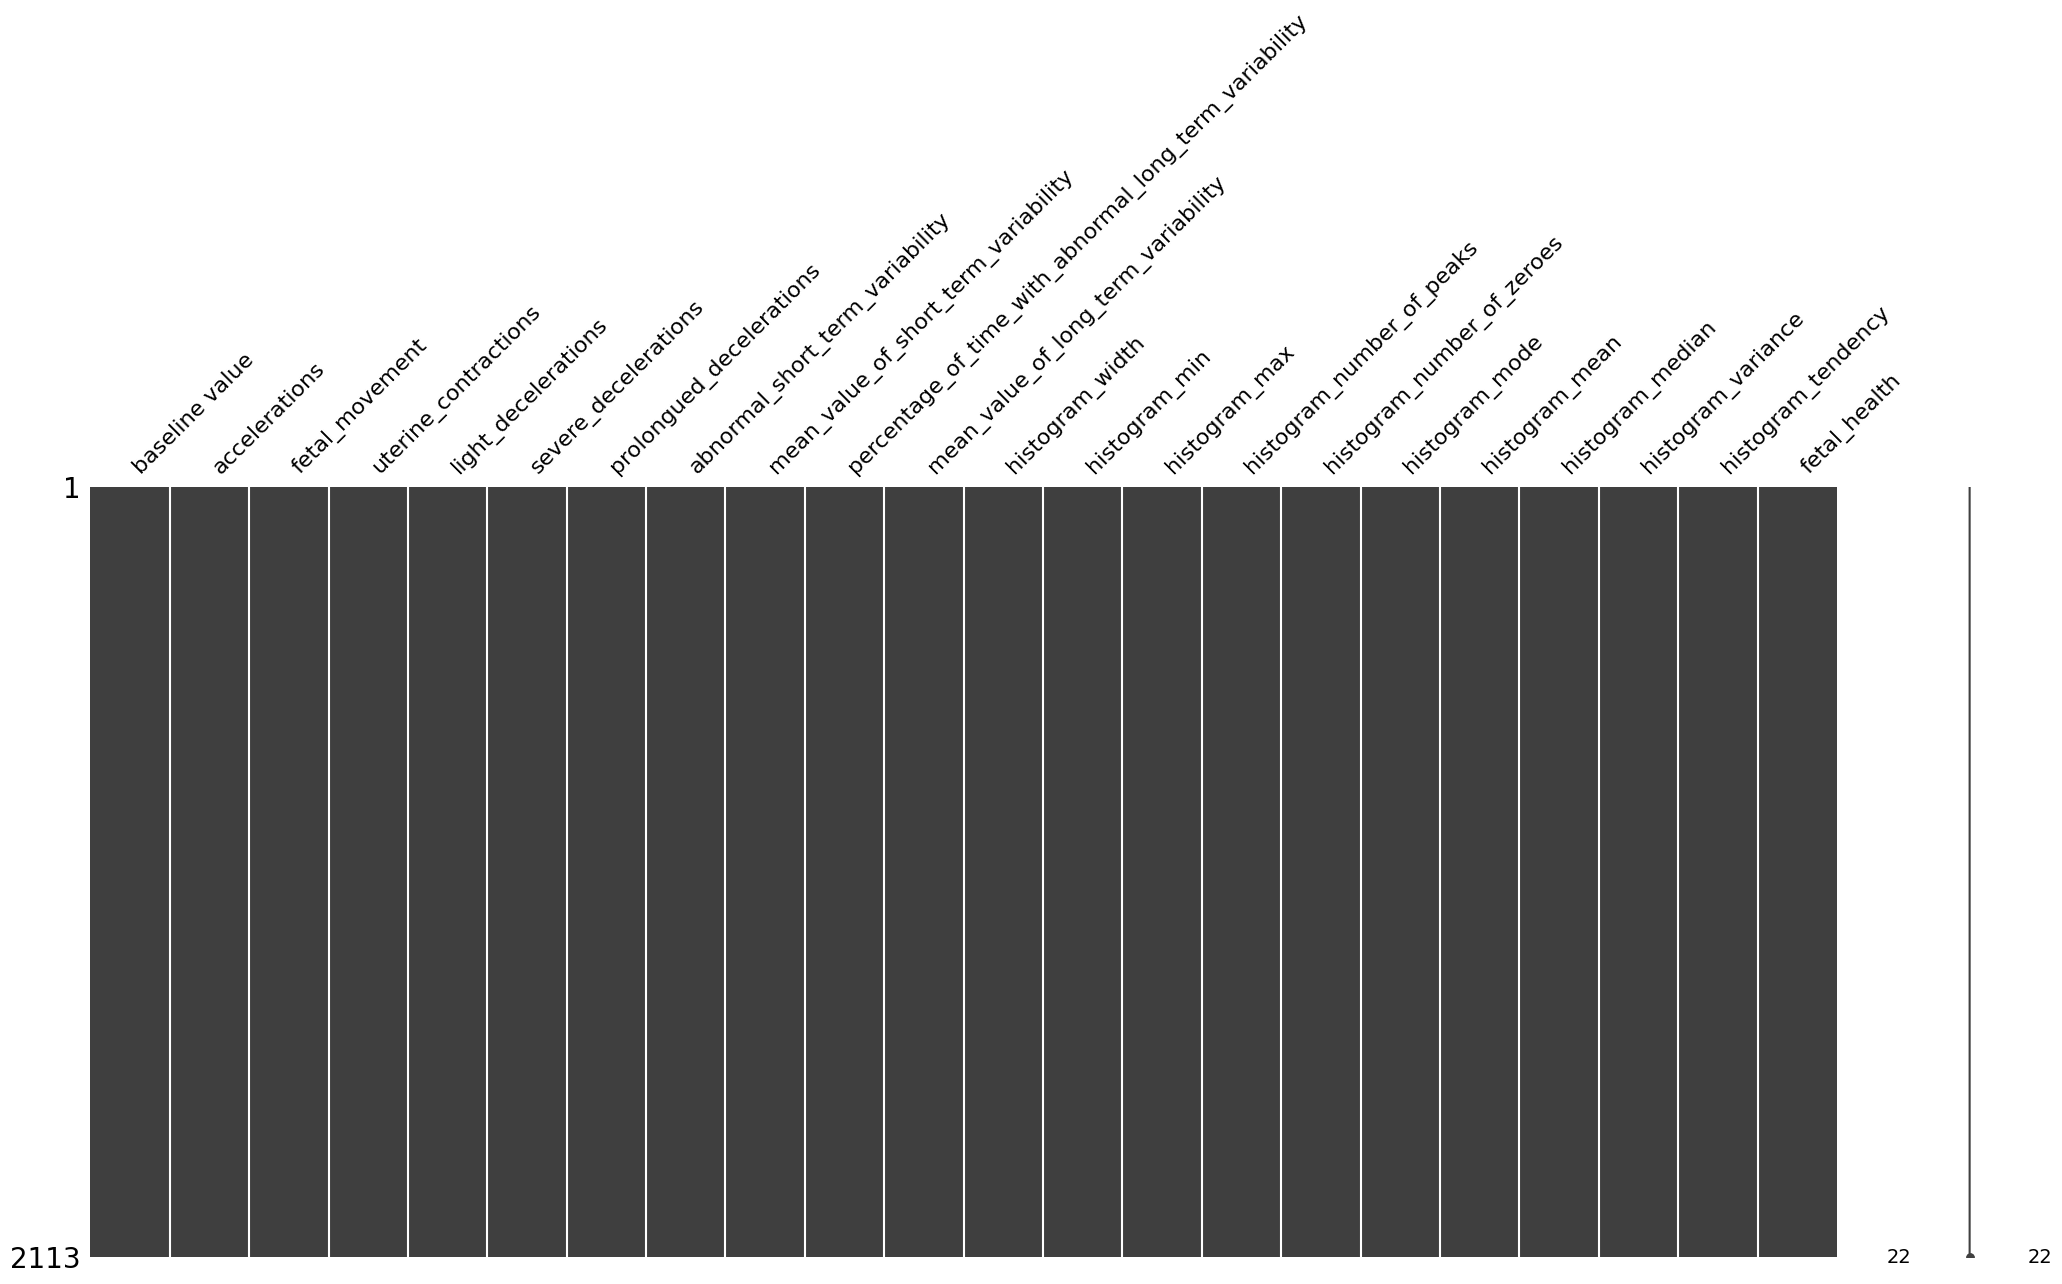

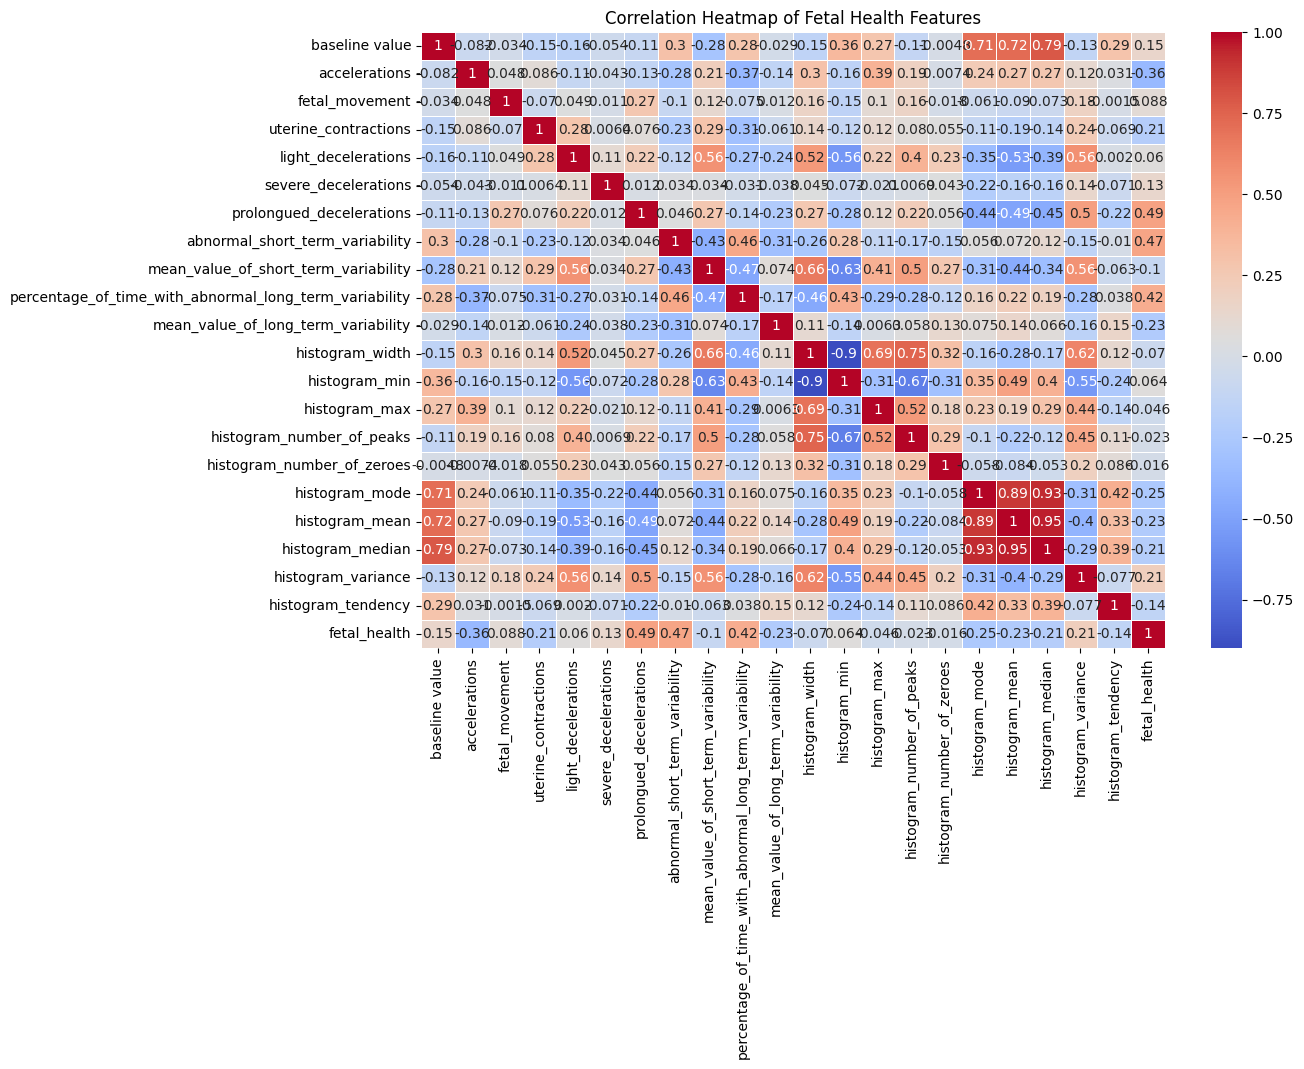

<ipython-input-1-8174eb148a38>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fetal_health', data=fetal_data, palette='viridis')


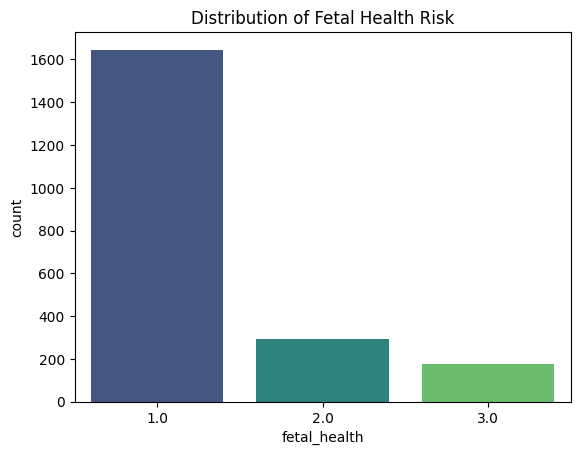

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import missingno as msno

# Step 1: Load the Dataset
file_path = 'fetal_health.csv'
fetal_data = pd.read_csv(file_path)

# Step 2: Inspect the Dataset
# View the first few rows
print(fetal_data.head())

# Check for missing values
print(fetal_data.isnull().sum())

# Check basic statistics
print(fetal_data.describe())

# Step 3: Data Cleaning
# Handling missing values (if any)
# If there are missing values, you can impute or drop them.
# In this case, assume no missing values. Otherwise, uncomment the following:
# fetal_data.fillna(fetal_data.mean(), inplace=True)

# Check for duplicates and remove them
fetal_data = fetal_data.drop_duplicates()

# Step 4: Exploratory Data Analysis (EDA)
# Visualize missing data (if present)
msno.matrix(fetal_data)

# Check the correlation matrix
correlation_matrix = fetal_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Fetal Health Features")
plt.show()

# Visualizing distribution of fetal health
sns.countplot(x='fetal_health', data=fetal_data, palette='viridis')
plt.title("Distribution of Fetal Health Risk")
plt.show()

# Step 5: Data Preprocessing
# Define features (X) and target (y)
X = fetal_data.drop(columns=['fetal_health'])
y = fetal_data['fetal_health']



In [2]:
# Standardize the features (important for models like SVM, k-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

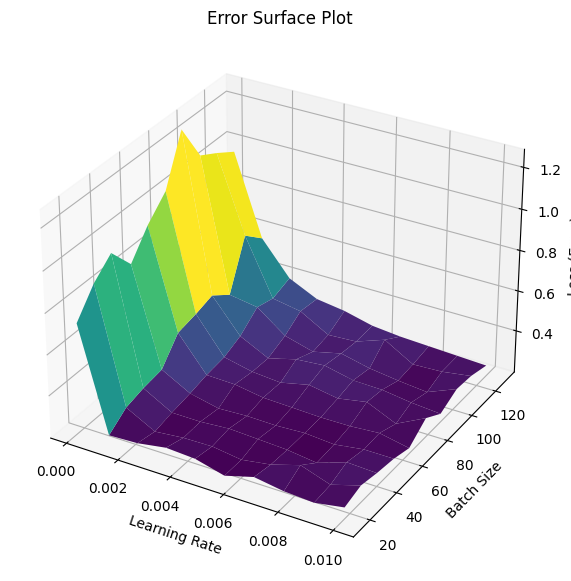

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from mpl_toolkits.mplot3d import Axes3D

# Function to create and compile the model
def create_model(learning_rate):
    model = Sequential()

    # Use Input() layer to define input shape
    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Set learning rates and batch sizes to evaluate
learning_rates = np.linspace(0.0001, 0.01, 10)  # Vary learning rates from 0.0001 to 0.01
batch_sizes = np.linspace(16, 128, 10, dtype=int)  # Vary batch sizes from 16 to 128

# Initialize a matrix to store the loss values for each combination of learning rate and batch size
loss_values = np.zeros((len(learning_rates), len(batch_sizes)))

# Adjust the labels (assuming labels are 1-based, adjust to 0-based indexing)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# One-hot encode the labels (assuming labels are adjusted to start from 0)
y_train_onehot = to_categorical(y_train_adjusted, num_classes=3)
y_test_onehot = to_categorical(y_test_adjusted, num_classes=3)

# Loop through all combinations of learning rate and batch size
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        # Create and compile the model
        model = create_model(learning_rate=lr)

        # Train the model (for simplicity, only 1 epoch to speed up this example)
        model.fit(X_train, y_train_onehot, epochs=1, batch_size=bs, verbose=0)

        # Evaluate the model on the test set and record the loss
        loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
        loss_values[i, j] = loss

# Create a 3D plot of the error surface
X, Y = np.meshgrid(learning_rates, batch_sizes)  # Create meshgrid for 3D plot

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, loss_values.T, cmap='viridis')

# Set plot labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Loss (Error)')
ax.set_title('Error Surface Plot')

plt.show()


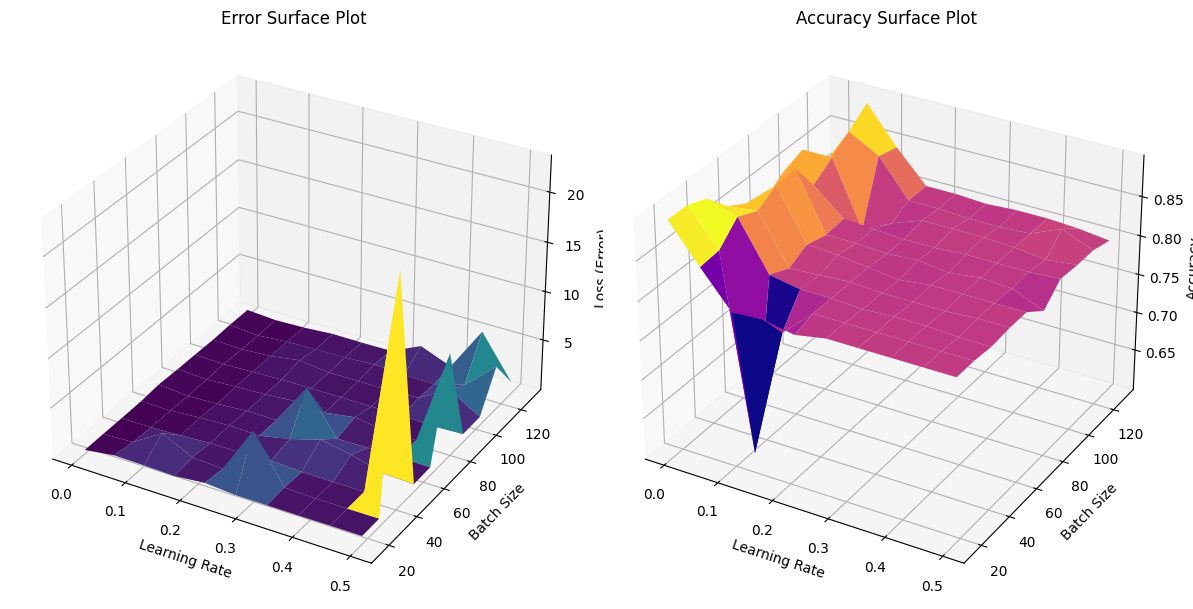

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from mpl_toolkits.mplot3d import Axes3D

# Function to create and compile the model
def create_model(learning_rate):
    model = Sequential()

    # Use Input() layer to define input shape
    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Set learning rates and batch sizes to evaluate
learning_rates = np.linspace(0.001, 0.5, 10)  # Vary learning rates from 0.0001 to 0.01
batch_sizes = np.linspace(16, 128, 10, dtype=int)  # Vary batch sizes from 16 to 128

# Initialize matrices to store the loss and accuracy values for each combination of learning rate and batch size
loss_values = np.zeros((len(learning_rates), len(batch_sizes)))
accuracy_values = np.zeros((len(learning_rates), len(batch_sizes)))

# Adjust the labels (assuming labels are 1-based, adjust to 0-based indexing)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# One-hot encode the labels (assuming labels are adjusted to start from 0)
y_train_onehot = to_categorical(y_train_adjusted, num_classes=3)
y_test_onehot = to_categorical(y_test_adjusted, num_classes=3)

# Loop through all combinations of learning rate and batch size
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        # Create and compile the model
        model = create_model(learning_rate=lr)

        # Train the model (for simplicity, only 1 epoch to speed up this example)
        model.fit(X_train, y_train_onehot, epochs=1, batch_size=bs, verbose=0)

        # Evaluate the model on the test set and record the loss and accuracy
        loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
        loss_values[i, j] = loss
        accuracy_values[i, j] = accuracy

# Create a 3D plot of the error (loss) surface
X, Y = np.meshgrid(learning_rates, batch_sizes)  # Create meshgrid for 3D plot

fig = plt.figure(figsize=(12, 6))

# Loss Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, loss_values.T, cmap='viridis')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Batch Size')
ax1.set_zlabel('Loss (Error)')
ax1.set_title('Error Surface Plot')

# Accuracy Surface Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, accuracy_values.T, cmap='plasma')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Batch Size')
ax2.set_zlabel('Accuracy')
ax2.set_title('Accuracy Surface Plot')

plt.tight_layout()


plt.show()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6562 - loss: 1.1315 - val_accuracy: 0.8800 - val_loss: 0.6061
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8397 - loss: 0.6139 - val_accuracy: 0.8871 - val_loss: 0.5034
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8428 - loss: 0.5614 - val_accuracy: 0.8776 - val_loss: 0.4779
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8788 - loss: 0.4857 - val_accuracy: 0.9059 - val_loss: 0.4140
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8698 - loss: 0.4645 - val_accuracy: 0.9082 - val_loss: 0.3965
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.4532 - val_accuracy: 0.8847 - val_loss: 0.4199
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.4663 - val_accuracy: 0.8988 - val_loss: 0.4110
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.4090 - val_accuracy: 0.8918 - val_loss

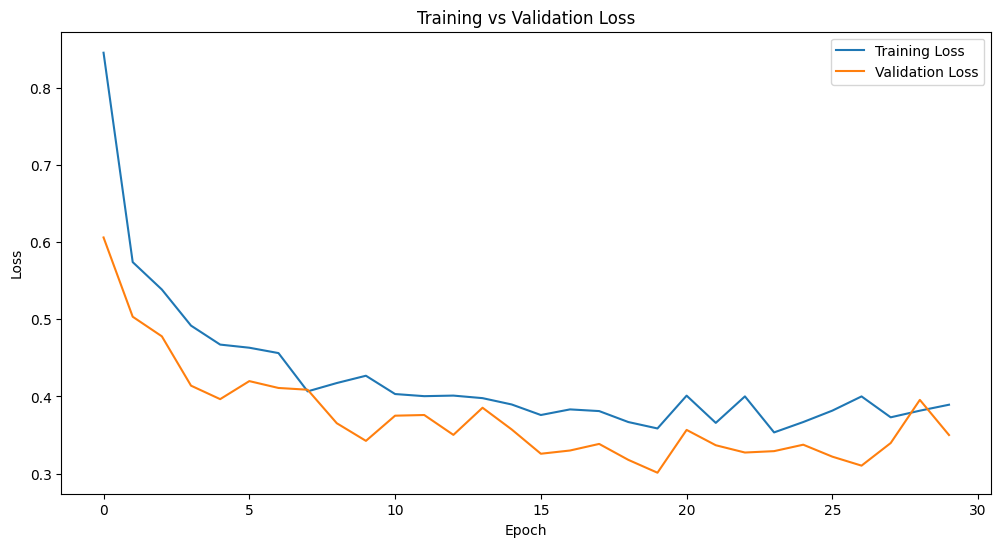

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Load and prepare the dataset
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)
X = data.drop(columns=['fetal_health'])  # Assuming 'fetal_health' is the target column
y = data['fetal_health']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Cross Validation Split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train - 1, num_classes=len(set(y_train)))
y_val_onehot = to_categorical(y_val - 1, num_classes=len(set(y_val)))
y_test_onehot = to_categorical(y_test - 1, num_classes=len(set(y_test)))

# Function to create and compile the model with improvements
def create_improved_model(learning_rate=0.01):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')  # Set the output layer to match the number of classes
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Initialize the model with the improved architecture
model_improved = create_improved_model()

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the improved model
history_improved = model_improved.fit(X_train, y_train_onehot, epochs=50, batch_size=32,
                                      validation_data=(X_val, y_val_onehot), verbose=1,
                                      callbacks=[early_stopping])

# Evaluate the improved model on the test set
test_loss_improved, test_accuracy_improved = model_improved.evaluate(X_test, y_test_onehot)

# Plot training & validation loss values to check for overfitting
plt.figure(figsize=(12, 6))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
